In [1]:
# -*- coding: UTF-8 -*-

# Render our plots inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import shutil

pd.set_option('display.max_columns', None) # Display all the columns

sns.set()
#sns.set_style("whitegrid") # Seaborn style


In [3]:
data = pd.read_csv("csv/results.csv")

In [4]:
columns = ['Q44[SQ001]','Q44[SQ002]','Q44[SQ003]','Q44[SQ004]','Q44[SQ005]','Q44[SQ006]']
columns_names = [
    'I find OpenMetaDesign useful for discussing projects',
    'I find OpenMetaDesign useful for discussing processes',
    'I find OpenMetaDesign useful for discussing activities',
    'I find OpenMetaDesign useful for discussing flows',
    'I find OpenMetaDesign useful for discussing the organization of projects',
    'I find OpenMetaDesign useful for discussing problems in projects',
]
options = [
    '1 - Strongly disagree',
    '2 - Disagree',
    '3 - Neither agree nor disagree',
    '4 - Agree',
    '5 - Strongly agree',
    'No answer',
]
profile = data[columns]

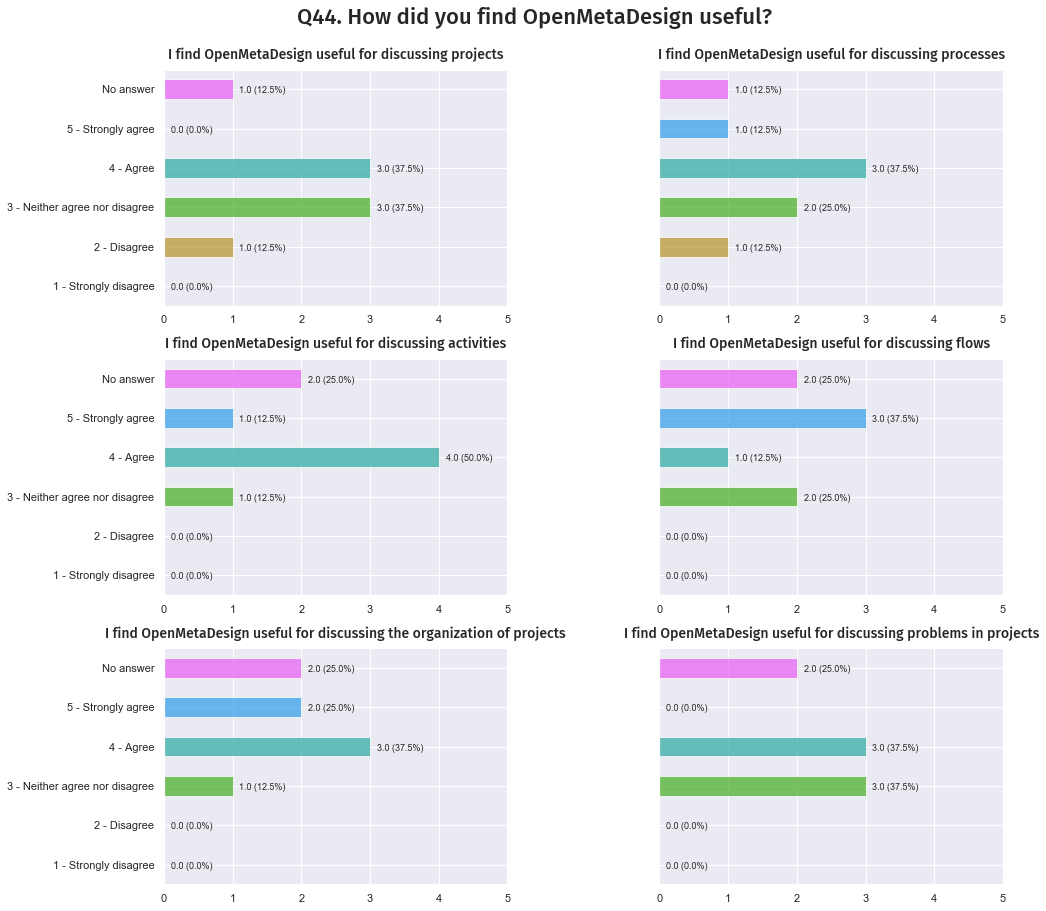

In [5]:
# All subquestions in the same plot
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.4, wspace=0.8)
fig.suptitle('Q44. How did you find OpenMetaDesign useful?', fontsize=22, fontname='Fira Sans', fontweight="500", y=1.02)
axes = []
for k, i in enumerate(columns):
    if k == 0:
        ax = fig.add_subplot(5, 2, k+1)
        axes.append(ax)
    else:
        ax = fig.add_subplot(5, 2, k+1, sharey=axes[0])
        axes.append(ax)
    ax.set_title(columns_names[k], fontsize=14, y=1.02, fontname='Fira Sans', fontweight="500")
    this_profile = profile[i].str.strip().fillna(value="No answer").value_counts(dropna=False).reindex(options).fillna(value=0)
    my_colors = sns.color_palette("husl", len(this_profile)) # Set color palette
    this_profile.plot(kind='barh', color=my_colors, alpha=0.75, rot=0)
    ax.set_xlim([0, 5])
    perc = profile[i].str.strip().fillna(value="No answer").value_counts(normalize=True, dropna=False) * 100
    perc = perc.reindex(options).fillna(value=0)
    for l, v in enumerate(this_profile):
        ax.text(v + .1, l-0.1, str(v)+" ("+str(perc[l])+"%)", fontweight='500', fontsize=9)
plt.tight_layout()
plt.savefig("svg/Q44.svg", bbox_inches="tight")
plt.savefig("png/Q44.png", dpi=300, bbox_inches="tight")